<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Exercise 4 - Transforming Numerical Variables</h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## Objectives

Linear and logistic regression assume that the variables are normally distributed. If they are not, we can often apply a mathematical transformation to change their distribution into Gaussian, and sometimes even unmask linear relationships between variables and their targets. This means that transforming variables may improve the performance of linear machine learning models. 

Commonly used mathematical transformations include the logarithm, reciprocal, power, square and cube root transformations, as well as the Box-Cox and Yeo-Johnson transformations. This week we will learn how to implement all of these operations on the variables in our dataset using the NumPy, SciPy, scikit-learn, and Feature-engine libraries.

Pls refer to the `Practical 4.1 - Practical 4.6` in the seperate files for details. 

## Exercise

In `airbnb_sg` dataset, check the distribution of `minimum_nights` and `number_of_reviews` columns. Are they following normal distribution or not? Please utilize the numerical data transformation methods you learned to transform the data into normal distribution.

In [1]:
# Task 0: import all the required packages
import numpy as np
import pandas as pd
# for plotting
import matplotlib.pyplot as plt
# for Q-Q plots
import scipy.stats as stats
# with open-source packages
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import PowerTransformer

In [2]:
# Task 1: load the dataset and show the info of dataset
df = pd.read_csv('./data/airbnb_sg.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [3]:
# Task 2: find numerical variables
numcol =  [c for c in df.columns if df[c].dtypes!='O']
numcol

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>],
       [<AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

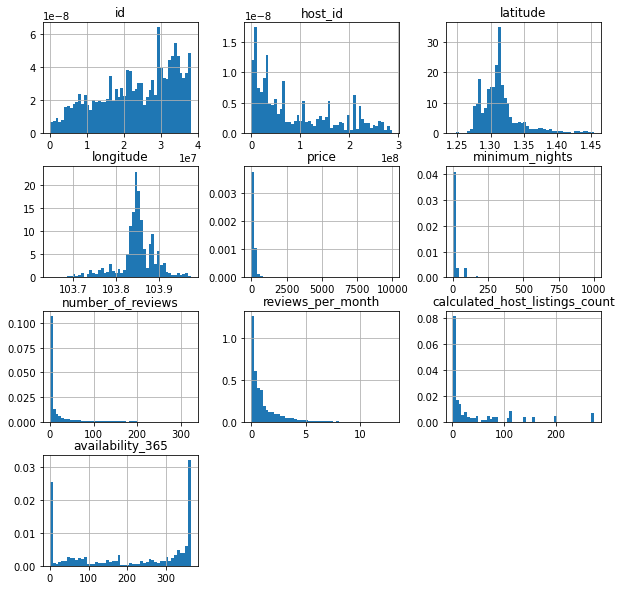

In [4]:
# Task 3: plot the histogram to the num variables
df[numcol].hist(bins=50, figsize=(10,10), density=True)

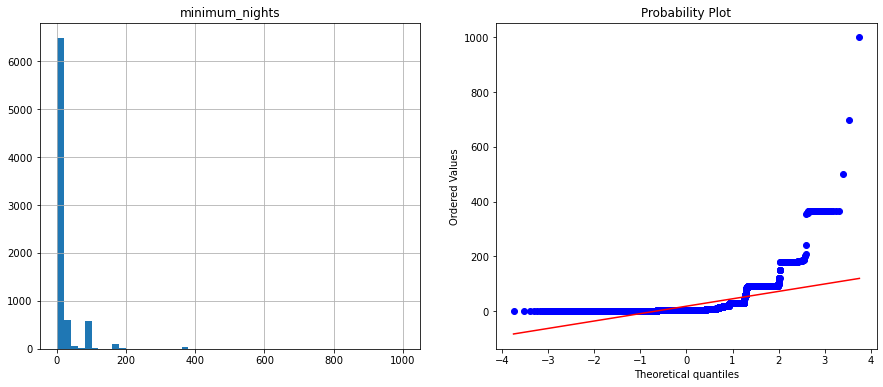

None


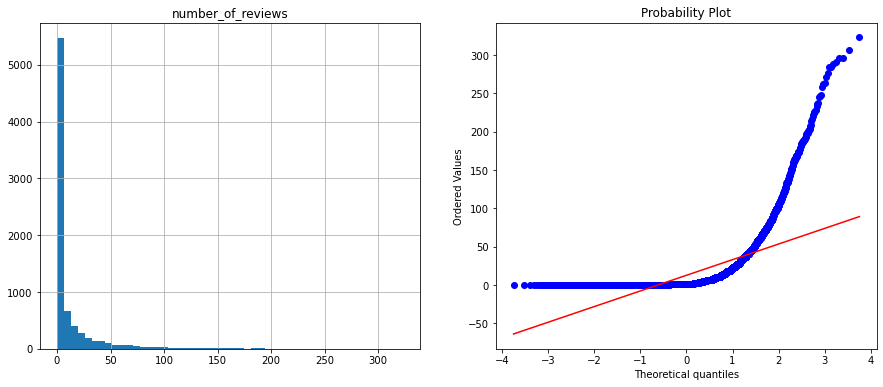

None


In [5]:
# Task 4: plot histogram and Q-Q plots for variables: minimum_nights & number_of_reviews 
# to have a look at the variable distribution
def diagnostic_plots(data, var):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.title(var)
    data[var].hist(bins=50)
    plt.subplot(1, 2, 2)
    stats.probplot(data[var], dist="norm", plot=plt)
    plt.show()

print(diagnostic_plots(df, 'minimum_nights'))
print(diagnostic_plots(df, 'number_of_reviews'))

In [6]:
# Task 5: transform the variables (minimum_nights & number_of_reviews) 
# using any of the methods learned this week

#Inspecting the data and determining the transformation
df_tf = df.copy()
print(df_tf['minimum_nights'].describe())
print(df_tf['number_of_reviews'].describe())
#Square root transformation as the values are >= 0
df_tf[['number_of_reviews','minimum_nights']] = np.sqrt(df[['number_of_reviews','minimum_nights']])

count    7907.000000
mean       17.510054
std        42.094616
min         1.000000
25%         1.000000
50%         3.000000
75%        10.000000
max      1000.000000
Name: minimum_nights, dtype: float64
count    7907.000000
mean       12.807386
std        29.707746
min         0.000000
25%         0.000000
50%         2.000000
75%        10.000000
max       323.000000
Name: number_of_reviews, dtype: float64


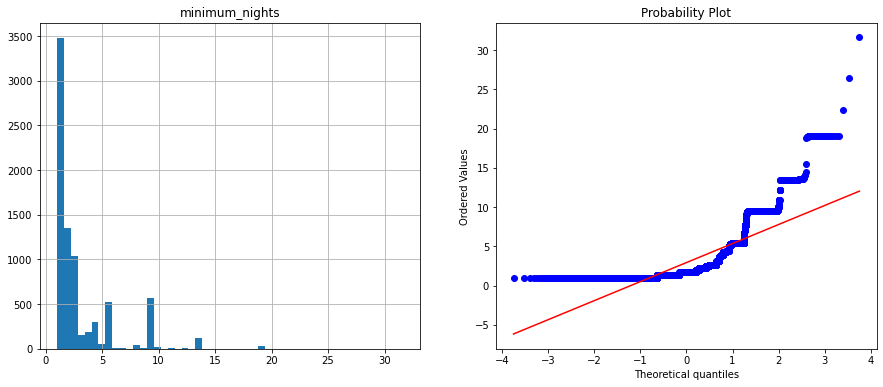

None


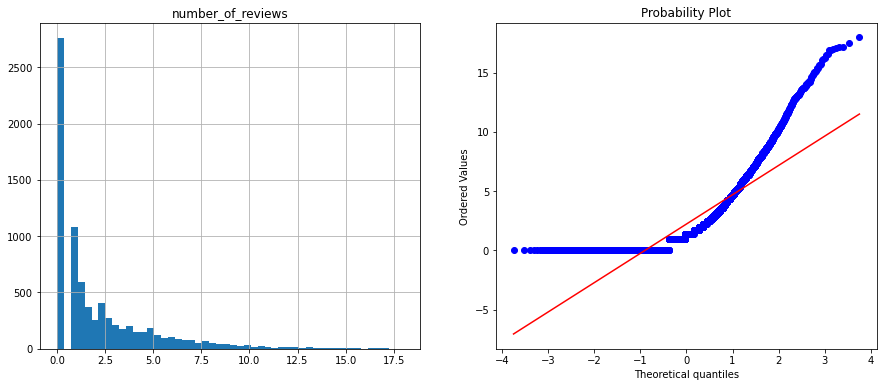

None


In [7]:
# Task 6: plot histogram and Q-Q plots for variables (after transformation): 
# minimum_nights & number_of_reviews 
print(diagnostic_plots(df_tf, 'minimum_nights'))
print(diagnostic_plots(df_tf, 'number_of_reviews'))

In [8]:
# Task 7: Comment on the variable distributions before and after transformation.
#After the transformation, the values are closer to each other and are less spread out. 
#The new values also have a lower variation from the red line and the red line is more linear and direct between the 2 axis
#This indicates that the new values follow a more normal distribution